# $Le$ $ Ch\hat{a}teliers $ $prinsipp$

I denne oppgaven skal vi se på følgende reaksjonsligning:

$$ N_{2} + 3H_{2} \rightleftharpoons 2NH_{3} $$ 
 

Likevektsutrykket for reaksjonen skrives slik: 
$$ K = \frac { [NH_{3}]^2 } { [N_{2}][H_{2}]^3 } = 5.96\times{}10^{-2}$$ 
hvor $[A]$ vil være likevektskonsentrasjonen til $A$.

Å regne ut likevektskonsentrasjonene fra startkonsentrasjonene for denne reaksjonen, vil gi en ligning av 4. grad. Det skal derfor bli trinnvis forklart hvordan ligningen kan løses numerisk i python. Mye av koden er ferdigskrevet, og steder hvor du skal fylle inn kode er markert slik:
```
    ### FORKLARING PÅ HVA SOM SKAL KODES ###
```


```
```
```
```
Det ligger flere testfunksjoner i dette programmet. Koden til testfunksjonene er ferdigskrevet, og alt du trenger å gjøre er å kjøre koden når du har skrevet ferdig koden i cellen ovenfor. Testfunksjonen vil fortelle deg om koden din eventuelt ikke fungerer som forventet. Merk at testfunksjonen ikke alltid vil finne alle feil, og er derfor ingen absolutt garanti på at funksjonen er implementert helt riktig.

Du kjører koden ved å trykke:   shift + enter


<mark><strong>HUSK:</strong></mark> Programmet vil lagre variabler og funksjoner når du kjører bitene av programmet. For å unngå feil bør du nullstille "output"-en ofte. Dette gjør du slik:
    - klikk på "Cell"
    - velg "All Output"
    - klikk på "Clear"
    
## Reaksjonskvotient

La $x$ være endringen i $[N_{2}]$ fra startkonsentrasjon. Hvis du skulle løse denne oppgaven analytisk, ville du satt $x$ til endringen fra startkonsentrasjon til likevektskonsentrasjon. I stedet for å løse ligningen for $x$ (ettersom det blir fryktelig vanskelig å løse) skal du heller skrive en funksjon find_Q som regner ut reaksjonskvotienten $Q$ for en gitt verdi for $x$. Reaksjonskvotienten skrives slik: 

$$ Q = \frac { [NH_{3}]^2 } { [N_{2}][H_{2}]^3 } $$ 

hvor $[B]$ er konsentrasjonen til $B$, regnet ut fra startkonsentrasjon og endring $x$. Hvis $ K = Q $ vil $[B]$ være likevektskonsentrasjonen til $B$.


find_Q tar inn startkonsentrasjonene til de tre komponentene og en foreslått endring $x$. Funksjonen regner ut de nye konsentrasjonene til alle tre komponentene, for så å regne ut reaksjonskvotienten. Funksjonen returnerer alle fire verdiene.

In [1]:
def find_Q(x, N2_0, H2_0, NH3_0):
    N2 = N2_0 - x
    H2 = H2_0 - 3*x
    NH3 = NH3_0 + 2*x 
    Q = (NH3**2)/(N2*H2**3)
    return Q, N2, H2, NH3  

Neste celle inneholder en testfunksjon. Denne vil se etter noen typiske feil fra koden i ```find_Q```. Hvis den gjenkjenner en feil, vil du få tilbakemelding om hva den tror du har gjort galt. Les derfor eventuell feilmelding. Kjør denne når du har skrevet ferdig ```find_Q```.

In [2]:
def test_find_Q():
    N2_0 = 1.399
    H2_0 = 1.197
    NH3_0 = 0.202
    x = 0.0505187943924
    expected_N2 = 1.34848120561
    expected_H2 = 1.04544361682
    expected_NH3 = 0.303037588785
    Q, N2, H2, NH3 = find_Q(x, N2_0, H2_0, NH3_0)
   
    wrong_sign = [1.44951879439, 1.34855638318, 0.100962411215]
    wrong_stiochiometry = [float('nan'), 1.14648120561, 0.252518794392]
    no_change = [N2_0, H2_0, NH3_0]
    wrong_both = [float('nan'), 1.24751879439, 0.151481205608]
    tol = 1e-9
    i = 0
    message = ' '
    for value in [N2, H2, NH3]:
        if abs(value - wrong_sign[i]) < tol:
            message = 'Please consider the sign when calculating new concentrations!'
            break
        if abs(value - no_change[i]) < tol:
            message = 'New concentrations will depend on given x!'
            break
        if abs(value - wrong_stiochiometry[i]) < tol or abs(value - wrong_both[i]) < tol:
            message = 'Consider the stoichiometry when calculating new concentrations!'
            break 
        i += 1
    success = abs(Q - 5.96e-2) < 1e-12
    assert success, message

test_find_Q()   

## Begrense mulige verdier for $X$
Ligningen til likevektsutrykket vil egentlig gi fire løsninger for $x$. Vi er bare interessert i én av disse. For å unngå falske løsninger, skal du lage en funksjon som regner ut både den minste og den største mulige verdien for $x$. Endringen $x$ kan hverken bli så stor i negativ eller positiv retning at noen av konsentrasjonene blir negativ. 


```min_x``` skal passe på at $[NH_{3}]$ ikke blir negativ.

```max_x``` skal passe på at hverken $[H_{2}]$ eller $[N_{2}]$ blir negativ. Her er brukes en if-test for å avgjøre hvilken av reaktantene som er den begrensende.

In [3]:
def find_x_range(N2_0, H2_0, NH3_0):
    min_x = - NH3_0/2 
    if N2_0 < H2_0/3:
        max_x = N2_0
    else:
        max_x = H2_0/3
    return min_x, max_x

Neste celle inneholder en testfunksjon. Denne vil se etter noen typiske feil fra koden i ```find_x_range```. Hvis den gjenkjenner en feil, vil du få tilbakemelding om hva den tror du har gjort galt. Les derfor eventuell feilmelding. Kjør denne når du har skrevet ferdig ```find_x_range```. 

In [4]:
def test_find_x_range():
    minNH3 = -0.101
    maxH2 = 0.399
    maxN2 = 0.299
    computed = list(find_x_range(1.399,1.197,0.202))
    case2 = find_x_range(0.299,1.197,0.202)
    computed.append(case2[1])
    w_sign = [0.101, -0.399, -0.299]    
    w_stiochiometry = [-0.202, 1.197, float('nan')]
    wrong_both = [0.202, -1.197, float('nan')]
    tol = 1e-9
    i = 0
    message = ' '
    for value in computed:
        if abs(value - w_sign[i]) < tol:
            message = 'Check if the numbers have the correct sign'
            break
        if abs(value - w_stiochiometry[i]) < tol or abs(value - wrong_both[i]) < tol:
            message = 'Consider the stoichiometry when calculating min_x and max_x!'
            break 
        i += 1
    success_list = [abs(expected - computed) < tol for expected, computed in zip([minNH3, maxH2, maxN2], computed)] 
    success = False not in success_list
    case3 = find_x_range(1.09,1.100,0.202)
    if abs(case3[1] - 1.9) < tol:
        message = 'Does the if-test consider the stoichiometry?'
        success = False
    assert success, message
    
test_find_x_range()    

## Beregne likevektskonsentrasjonene

Funksjonen under skal, gitt startkonsentrasjonene, finne likevektskonsentrasjonene til reaksjonen. Ved å kalle på ```find_x_range``` kan det bestemmes på hvilket intervall endringen i $[N_{2}]$ fra startkonsentrasjon til likevektskonsentrasjon nødvendigvis må ligge. Vi har da at altså at $ x \in [x_{min}, x _{max}] $. Funksjonen skal gå gjennom en løkke som oppdaterer verdien for $x$ frem til den finner en x slik at  $ Q = K $. ```Find_Q```, som returnerer både $Q$ og konsentrasjonene, skal kalles på i løkken. Når $ Q = K $, med en viss toleranse, vil løkken avsluttes ved at funksjonen returnerer likevektskonsentrasjonene. Så lenge $ Q \neq K $, vil løkken fortsette.


Oppdatering av verdien for $x$ i løkken skal ikke gjøres ved å gå fra $x_{min}$ til $x_{max}$ med kort steglengde. Dette vil både ta unødvendig mye tid og datakraft, og det vil være fare for at riktig verdi for $x$ hoppes over hvis steglengden er for lang. I stedet skal $x$ settes til midt mellom $x_{min}$ og $x_{max}$. Når $ Q \neq K $, vil det lett kunne avgjøres om $x$ var for stor eller for liten. Hvis den var for stor, settes $x_{max}$ til $x$, og tilsvarende hvis $x$ var for liten. På denne måten vil intervallet til mulige verdier for $x$ halveres for hver løkke. 

In [5]:
def equilibrium(N2_0, H2_0, NH3_0):
    K = 5.96e-2      # Equilibrium constant
    tol = 1e-12 
    min_x, max_x = find_x_range(N2_0, H2_0, NH3_0)
    for tries in range(100):
        x = (max_x + min_x)/2
        Q, N2, H2, NH3 = find_Q(x, N2_0, H2_0, NH3_0)
        if abs(Q - K) < tol:
            return N2, H2, NH3
        if Q > K:
            max_x = x
        else:
            min_x = x

Når du har skrevet funksjonen ```equilibrium``` ferdig, bør du teste om den fungerer som forventet ved å kjøre testfunskjonen under.

In [6]:
def test_equilibrium():
    expected = [1.34848120561, 1.04544361682, 0.303037588785]
    computed = list(equilibrium(1.399,1.197,0.202))
    success_list = [abs(ex - co) < 1e-9 for ex, co in zip(expected, computed)] 
    success = False not in success_list
    assert success
test_equilibrium()

## Plotte likevektskonsentrasjon mot startkonsentrasjon
Resten av programmet er ferdig skrevet. Det er likevel viktig at du forstår hva det gjør. I neste celle regnes likevektskonsentrasjon ut ved å kalle på ```equilibrium```. $[H_2]$ og $[NH_3]$ holdes konstant, mens $[N_2]$ variere. For alle tre komponenter plottes så likevektskonsentrasjon og startkonsentrasjon mot startkonsentrasjonen til $[N_2]$.

Kjør koden.

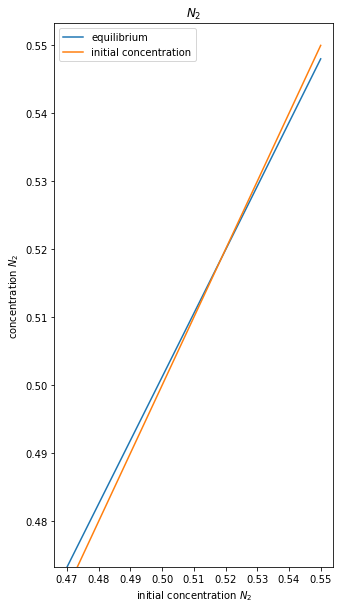

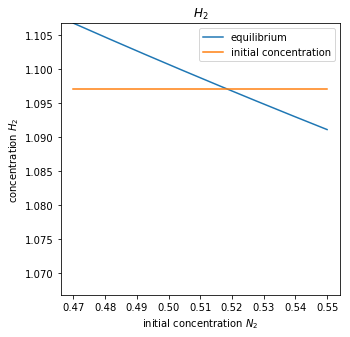

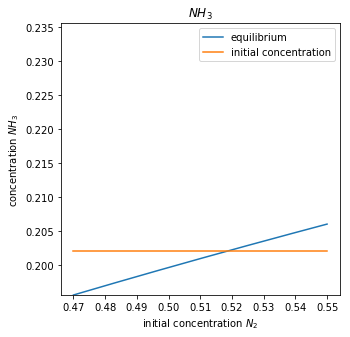

In [66]:
import numpy as np
import matplotlib.pyplot as plt

N = 250
# initial concentrations
H2_0 = 1.097
NH3_0 = 0.202
N2_0_liste = np.linspace(0.47, 0.55, N)

konsentrasjoner = np.zeros(N, dtype='3float')

i = 0
for N2_0 in N2_0_liste:
    konsentrasjoner[i] = equilibrium(N2_0, H2_0, NH3_0)
    i += 1

H2_0 = np.zeros(N)+H2_0
NH3_0 = np.zeros(N)+NH3_0

yrange = 0.04
x_size = 5
y_size = 5

plt.figure(figsize=(x_size, y_size*2))
plt.plot(N2_0_liste, konsentrasjoner[:,0], label="equilibrium")
plt.plot(N2_0_liste, N2_0_liste, label="initial concentration")
plt.xlabel("initial concentration $N_{2}$")
plt.ylabel("concentration $N_{2}$")
plt.ylim([konsentrasjoner[:,0][0], konsentrasjoner[:,0][0] + yrange*2])
plt.legend()
plt.title("$N_{2}$")
plt.show()

plt.figure(figsize=(x_size, y_size))
plt.plot(N2_0_liste, konsentrasjoner[:,1], label="equilibrium")
plt.plot(N2_0_liste, H2_0, label="initial concentration")
plt.xlabel("initial concentration $N_{2}$")
plt.ylabel("concentration $H_{2}$")
plt.ylim([konsentrasjoner[:,1][0] - yrange, konsentrasjoner[:,1][0]])
plt.legend()
plt.title("$H_{2}$")
plt.show()

plt.figure(figsize=(x_size, y_size))
plt.plot(N2_0_liste, konsentrasjoner[:,2], label="equilibrium")
plt.plot(N2_0_liste, NH3_0, label="initial concentration")
plt.xlabel("initial concentration $N_{2}$")
plt.ylabel("concentration $NH_{3}$")
plt.ylim([konsentrasjoner[:,2][0], konsentrasjoner[:,2][0] + yrange])
plt.legend()
plt.title("$NH_{3}$")
plt.show()

## Forklar plottene ut fra Le Châteliers prinsipp.